In [5]:
# dependencies
from config import owm_key
import pandas as pd
import numpy as np
import requests
import json
from citipy import citipy
import random
import matplotlib.pyplot as plt
from scipy.stats import linregress
import os
import time

In [6]:
# set up df
columns = ["City", "Country", "Latitude", "Longitude", "Temperature (C)", "Cloudiness (%)", "Humidity (%)", "Wind speed (m/s)", "Datetime"]
cities_df = pd.DataFrame(columns=columns)

In [22]:
# set up api calling
base_url = f"https://api.openweathermap.org/data/2.5/weather?appid={owm_key}&units=metric&q="

cities_list = []
city_count = len(cities_list)

# while instead of loop to exclude duplicates/errors as we go
while city_count < 500:
    # generate random coordinates and find nearest city
    try_lat = random.randint(-90,90)
    try_long = random.randint(-180,180)

    city = citipy.nearest_city(try_lat, try_long).city_name

    if city not in cities_list:
        try:
            response = requests.get(base_url+city).json()
            # info to pull
            city_name = response["name"]
            country = response["sys"]["country"]
            city_lat = response["coord"]["lat"]
            city_long = response["coord"]["lon"]
            temp = response["main"]["temp_max"]
            cloud = response["clouds"]["all"]
            humidity = response["main"]["humidity"]
            wind = response["wind"]["speed"]
            datetime = response["dt"]

            append_info = [city_name, country, city_lat, city_long, temp, cloud, humidity, wind, datetime]
            append_series = pd.Series(append_info, index=cities_df.columns)
            cities_df = cities_df.append(append_series, ignore_index=True)
            cities_list.append(city)
            city_count += 1

            print(f"{city_name} info pulled. {city_count}/500")


        except Exception:
            print(f"Data not found for {city}.")
    
    else:
        print(f"{city} already has data. Finding new city...")

    # sleep to ensure under api call limit (60/minute)
    time.sleep(1)

Ushuaia info pulled. 1/500
San Andrés info pulled. 2/500
Mataura info pulled. 3/500
Jamestown info pulled. 4/500
Albany info pulled. 5/500
Yulara info pulled. 6/500
San Patricio info pulled. 7/500
Cabo San Lucas info pulled. 8/500
Grand Gaube info pulled. 9/500
Bilma info pulled. 10/500
Ribeira Grande info pulled. 11/500
Atikokan info pulled. 12/500
Huarmey info pulled. 13/500
Pirgos info pulled. 14/500
Kapaa info pulled. 15/500
Avarua info pulled. 16/500
New Norfolk info pulled. 17/500
Isangel info pulled. 18/500
Kyzyl-Mazhalyk info pulled. 19/500
Fortuna info pulled. 20/500
Rikitea info pulled. 21/500
Bluff info pulled. 22/500
Hobart info pulled. 23/500
Kerman info pulled. 24/500
mataura already has data. Finding new city...
Rawson info pulled. 25/500
Young info pulled. 26/500
Boa Vista info pulled. 27/500
Valleyview info pulled. 28/500
Longyearbyen info pulled. 29/500
Carnarvon info pulled. 30/500
Data not found for illoqqortoormiut.
Diu info pulled. 31/500
Data not found for taolan

In [26]:
# write df to csv
output_dir = os.path.join("output")
cities_csv = os.path.join(output_dir, "cities.csv")
cities_df.to_csv(cities_csv, index=False)

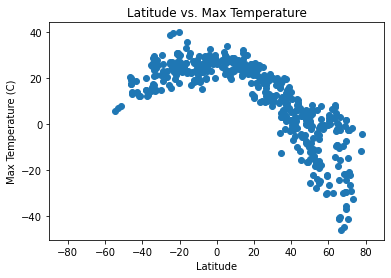

In [27]:
# latitude vs temp
plt.scatter(cities_df["Latitude"],cities_df["Temperature (C)"])
plt.xlim(-90,90)
plt.title("Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.savefig(os.path.join(output_dir,"latitude_temp"))
plt.show()

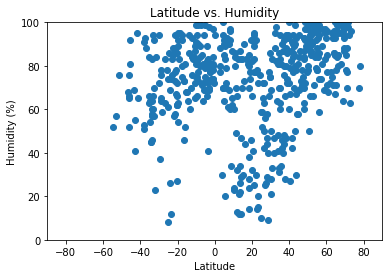

In [28]:
# latitude vs humidity
plt.scatter(cities_df["Latitude"],cities_df["Humidity (%)"])
plt.xlim(-90,90)
plt.ylim(0,100)
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig(os.path.join(output_dir,"latitude_humidity"))
plt.show()

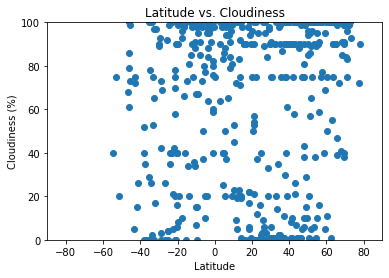

In [29]:
# latitude vs cloudiness
plt.scatter(cities_df["Latitude"],cities_df["Cloudiness (%)"])
plt.xlim(-90,90)
plt.ylim(0,100)
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig(os.path.join(output_dir,"latitude_cloud"))
plt.show()

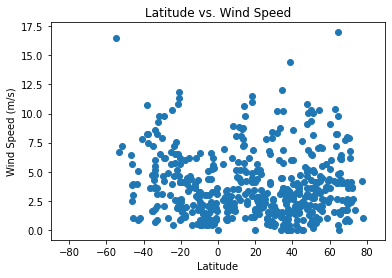

In [30]:
# latitude vs wind speed
plt.scatter(cities_df["Latitude"],cities_df["Wind speed (m/s)"])
plt.xlim(-90,90)
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.savefig(os.path.join(output_dir,"latitude_wind"))
plt.show()

In [31]:
# split dataframes into northern and southern hemispheres
north_df = cities_df[(cities_df['Latitude'] > 0)]
south_df = cities_df[(cities_df['Latitude'] < 0)]

R-value = -0.8490791491636023


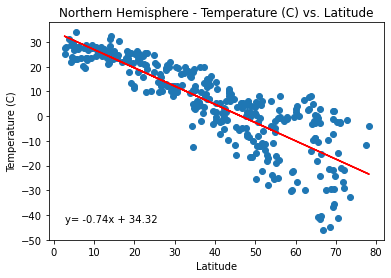

In [32]:
# northern hemisphere - max temp vs latitude + linear regression
plt.scatter(north_df["Latitude"],north_df["Temperature (C)"])
slope,intercept,rvalue,_,_ = linregress(north_df["Latitude"],north_df["Temperature (C)"].astype(float))
regress_values = north_df["Latitude"] * slope + intercept
plt.plot(north_df["Latitude"],regress_values,color="red")
model_str = f"y= {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(s= model_str,xy=[north_df["Latitude"].min(),int(north_df["Temperature (C)"].min() * 0.95)])
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
plt.title("Northern Hemisphere - Temperature (C) vs. Latitude")
print(f"R-value = {rvalue}")
plt.savefig(os.path.join(output_dir, "linreg_north_temp_latitude"))
plt.show()

R-value = 0.5403881546219329


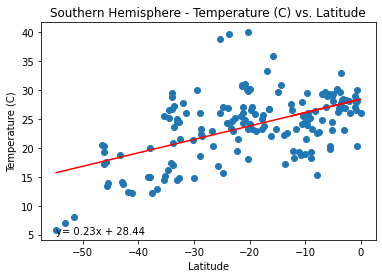

In [33]:
# southern hemisphere - max temp vs latitude + linear regression
plt.scatter(south_df["Latitude"],south_df["Temperature (C)"])
slope,intercept,rvalue,_,_ = linregress(south_df["Latitude"],south_df["Temperature (C)"].astype(float))
regress_values = south_df["Latitude"] * slope + intercept
plt.plot(south_df["Latitude"],regress_values,color="red")
model_str = f"y= {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(s= model_str,xy=[south_df["Latitude"].min(),int(south_df["Temperature (C)"].min() * 0.95)])
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
plt.title("Southern Hemisphere - Temperature (C) vs. Latitude")
print(f"R-value = {rvalue}")
plt.savefig(os.path.join(output_dir, "linreg_south_temp_latitude"))
plt.show()

R-value = 0.4294094724676789


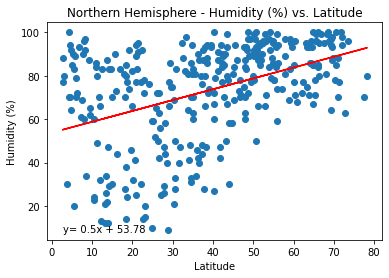

In [34]:
# northern hemisphere - humidity vs latitude + linear regression
plt.scatter(north_df["Latitude"],north_df["Humidity (%)"])
slope,intercept,rvalue,_,_ = linregress(north_df["Latitude"],north_df["Humidity (%)"].astype(float))
regress_values = north_df["Latitude"] * slope + intercept
plt.plot(north_df["Latitude"],regress_values,color="red")
model_str = f"y= {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(s= model_str,xy=[north_df["Latitude"].min(),int(north_df["Humidity (%)"].min() * 0.95)])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude")
print(f"R-value = {rvalue}")
plt.savefig(os.path.join(output_dir, "linreg_north_humidity_latitude"))
plt.show()

R-value = 0.32276022645585745


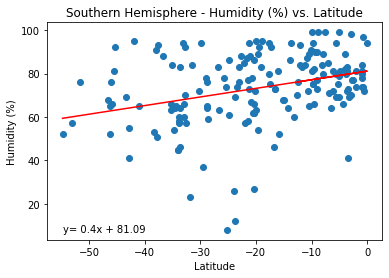

In [35]:
# southern hemisphere - humidity vs latitude + linear regression
plt.scatter(south_df["Latitude"],south_df["Humidity (%)"])
slope,intercept,rvalue,_,_ = linregress(south_df["Latitude"],south_df["Humidity (%)"].astype(float))
regress_values = south_df["Latitude"] * slope + intercept
plt.plot(south_df["Latitude"],regress_values,color="red")
model_str = f"y= {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(s= model_str,xy=[south_df["Latitude"].min(),int(south_df["Humidity (%)"].min() * 0.95)])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")
print(f"R-value = {rvalue}")
plt.savefig(os.path.join(output_dir, "linreg_south_humidity_latitude"))
plt.show()

R-value = 0.2332354776625585


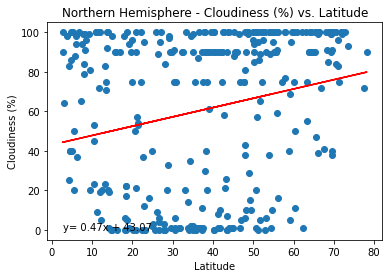

In [36]:
# northern hemisphere - cloudiness vs latitude + linear regression
plt.scatter(north_df["Latitude"],north_df["Cloudiness (%)"])
slope,intercept,rvalue,_,_ = linregress(north_df["Latitude"],north_df["Cloudiness (%)"].astype(float))
regress_values = north_df["Latitude"] * slope + intercept
plt.plot(north_df["Latitude"],regress_values,color="red")
model_str = f"y= {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(s= model_str,xy=[north_df["Latitude"].min(),int(north_df["Cloudiness (%)"].min() * 0.95)])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude")
print(f"R-value = {rvalue}")
plt.savefig(os.path.join(output_dir, "linreg_north_cloud_latitude"))
plt.show()

R-value = 0.32485400103420153


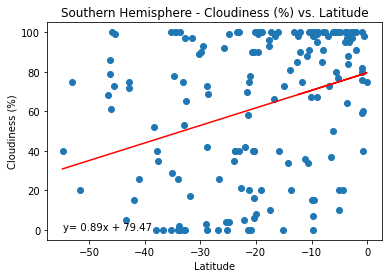

In [37]:
# southern hemisphere - cloudiness vs latitude + linear regression
plt.scatter(south_df["Latitude"],south_df["Cloudiness (%)"])
slope,intercept,rvalue,_,_ = linregress(south_df["Latitude"],south_df["Cloudiness (%)"].astype(float))
regress_values = south_df["Latitude"] * slope + intercept
plt.plot(south_df["Latitude"],regress_values,color="red")
model_str = f"y= {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(s= model_str,xy=[south_df["Latitude"].min(),int(south_df["Cloudiness (%)"].min() * 0.95)])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")
print(f"R-value = {rvalue}")
plt.savefig(os.path.join(output_dir, "linreg_south_cloud_latitude"))
plt.show()

R-value = 0.02220197394101085


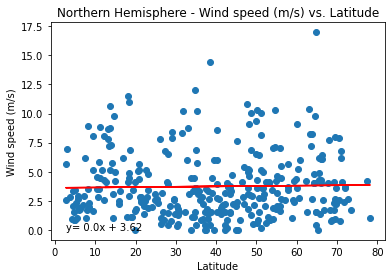

In [38]:
# northern hemisphere - wind speed vs latitude + linear regression
plt.scatter(north_df["Latitude"],north_df["Wind speed (m/s)"])
slope,intercept,rvalue,_,_ = linregress(north_df["Latitude"],north_df["Wind speed (m/s)"].astype(float))
regress_values = north_df["Latitude"] * slope + intercept
plt.plot(north_df["Latitude"],regress_values,color="red")
model_str = f"y= {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(s= model_str,xy=[north_df["Latitude"].min(),int(north_df["Wind speed (m/s)"].min() * 0.95)])
plt.xlabel("Latitude")
plt.ylabel("Wind speed (m/s)")
plt.title("Northern Hemisphere - Wind speed (m/s) vs. Latitude")
print(f"R-value = {rvalue}")
plt.savefig(os.path.join(output_dir, "linreg_north_wind_latitude"))
plt.show()

R-value = -0.4185155108334529


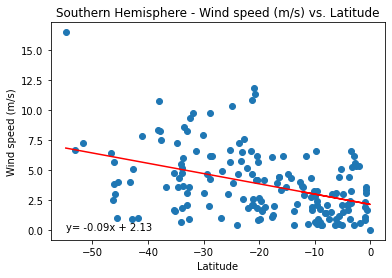

In [39]:
# southern hemisphere - wind speed vs latitude + linear regression
plt.scatter(south_df["Latitude"],south_df["Wind speed (m/s)"])
slope,intercept,rvalue,_,_ = linregress(south_df["Latitude"],south_df["Wind speed (m/s)"].astype(float))
regress_values = south_df["Latitude"] * slope + intercept
plt.plot(south_df["Latitude"],regress_values,color="red")
model_str = f"y= {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(s= model_str,xy=[south_df["Latitude"].min(),int(south_df["Wind speed (m/s)"].min() * 0.95)])
plt.xlabel("Latitude")
plt.ylabel("Wind speed (m/s)")
plt.title("Southern Hemisphere - Wind speed (m/s) vs. Latitude")
print(f"R-value = {rvalue}")
plt.savefig(os.path.join(output_dir, "linreg_south_wind_latitude"))
plt.show()

# Discussion

Predictably, the maximum temperature is higher as cities approach the equator. There are very few populations towards the extreme south of the planet, but it can be assumed that the data would be reasonably symmetrical with the north.

Humidity appears to have little correlation with latitude; instead, humidity may be more strongly influenced by a location’s altitude and/or proximity to major ocean currents.
 
Like humidity, cloudiness does not seem to correlate strongly to latitude.

While there are a few points where high wind speeds have been recorded at extreme latitudes, they are not consistent enough to conclude there is a relationship between them.


## Linear regression

There is a strong negative correlation between latitude and temperature for the northern hemisphere, at -0.849. However, as the latitude moves away from the equator, the data points become far more scattered. The same relationship for the southern hemisphere is more weakly correlated, at 0.540, and the scattering begins closer to the equator. The range of cities at southern latitudes is smaller than for the north, and there is less data to work with. When looking at the combined graph, it is evident that the relationship can be better represented with a quadratic expression rather than a linear one.

When comparing correlation between hemispheres, it may be expected that one will have a positive relationship while the other is negative. This is not the case for humidity; both north and south have positive, albeit weak correlations (0.429 and 0.323 respectively). The time of year must be considered when analysing; this data was taken on 19/12/21, where it is winter in the northern hemisphere. Precipitation in the form of rain, snow, and hail will contribute to the high humidity in many cities, even if the temperature is not high. For the south at this time of year, higher humidity closer to the equator is indicative of tropical conditions, where it may be the wet season in some places.

Cloudiness follows the same trends as precipitation, though to a lesser extent (0.233 and 0.325 respectively). It makes sense that cloudiness and humidity/precipitation are strongly associated, and comparing the two against each other may be an area of further study.

Wind speed has virtually no correlation to latitude in the northern hemisphere, but some relationship in the south (0.02 and -0.419). There may be other factors to consider, such as geography, time of day, and time of year.